In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

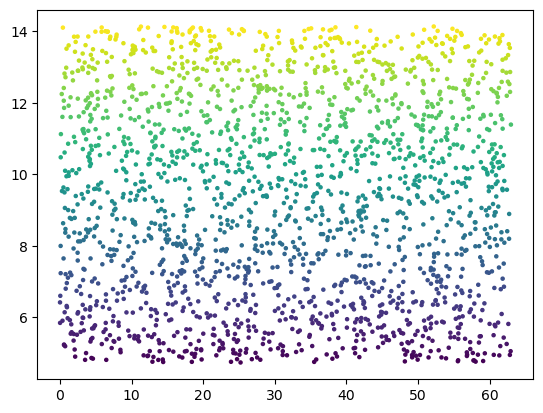

In [2]:
np.random.seed(42)
X, t = datasets.make_swiss_roll(2000,hole=False)
X[:, 1] *= 3
plt.scatter(X[:, 1],t, c=t,s =5, cmap = "viridis")

Using s_gd2 for MDS. None


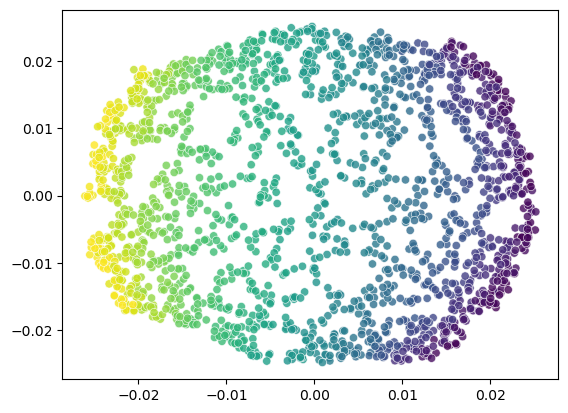

In [3]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


from heatgeo.embedding import HeatGeo
emb_op = HeatGeo(knn=5)
Y_heatgeo = emb_op.fit_transform(X)
# plt.scatter(emb[:, 0],emb[:, 1], c=t,s =5, cmap = "viridis")

sns.scatterplot(x=Y_heatgeo[:, 0], y=Y_heatgeo[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [4]:
# X_g = np.vstack((X[:, 1],t)).T
ground_truth = np.stack([X[:, 1], t], axis=1)
X_dists = spatial.distance.squareform(spatial.distance.pdist(ground_truth,metric = 'euclidean'))
heatgeo_Y_dists = spatial.distance.squareform(spatial.distance.pdist(Y_heatgeo,metric = 'euclidean'))

In [5]:
def correlation(matrix_A, matrix_B):
    
    from scipy import stats
    n_samples = matrix_A.shape[0]
    pearsonr_correlation_list = []
    spearmanr_correlation_list = []
    for i in range(n_samples):
        pearsonr_res = stats.pearsonr(matrix_A[i], matrix_B[i])
        pearsonr_correlation_list.append(pearsonr_res.statistic) 
        spearmanr_res = stats.spearmanr(matrix_A[i], matrix_B[i])
        spearmanr_correlation_list.append(spearmanr_res.statistic)
        
    pearsonr_correlation_mean = np.mean(pearsonr_correlation_list)
    spearmanr_correlation_mean = np.mean(spearmanr_correlation_list)
    pearsonr_correlation_interval = stats.norm.interval(confidence=0.95, loc=pearsonr_correlation_mean, scale=stats.sem(pearsonr_correlation_list))
    spearmanr_correlation_interval = stats.norm.interval(confidence=0.95, loc=spearmanr_correlation_mean, scale=stats.sem(spearmanr_correlation_list))
    
    correlation_mean = [pearsonr_correlation_mean,spearmanr_correlation_mean]
    correlation_interval = [pearsonr_correlation_interval,spearmanr_correlation_interval]
    
    pearsonr_correlation = [pearsonr_correlation_mean,pearsonr_correlation_interval]
    spearmanr_correlation = [spearmanr_correlation_mean,spearmanr_correlation_interval]
    
    return pearsonr_correlation_list,spearmanr_correlation_list,pearsonr_correlation,spearmanr_correlation 

In [6]:
heatgeo_dist = emb_op.dist
# heatgeo_dist = spatial.distance.squareform(spatial.distance.pdist(emb_op.dist,metric = 'euclidean'))

In [7]:
corr = correlation(X_dists,heatgeo_dist)
corr[2:]

([0.529426797056929, (0.5258028539033593, 0.5330507402104986)],
 [0.5481691494844217, (0.5412436344475696, 0.5550946645212739)])

In [8]:
tti = manifold.trustworthiness(heatgeo_dist,ground_truth,n_neighbors=50)
tti

0.9591694673941283

In [9]:
np.savetxt("swiss_Y_heatgeo.csv",Y_heatgeo,delimiter=',')

The code runs 5s.


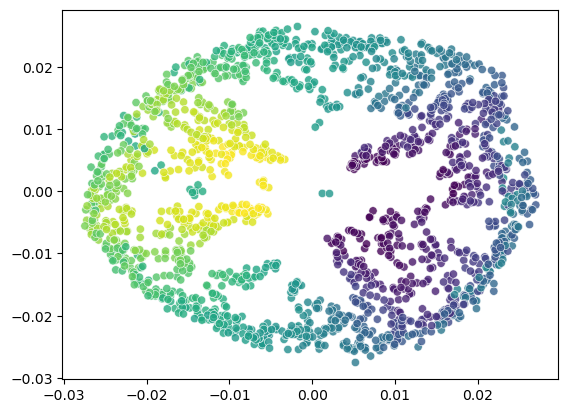

In [10]:
import phate

start_time = time.time()
phate_operator = phate.PHATE(verbose=False,random_state=0)
Y_phate = phate_operator.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
sns.scatterplot(x=Y_phate[:, 0], y=Y_phate[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [11]:
phate_Y_dists = spatial.distance.squareform(spatial.distance.pdist(Y_phate,metric = 'euclidean'))

In [12]:
phate_dists = spatial.distance.squareform(spatial.distance.pdist(phate_operator.diff_potential,metric = 'euclidean'))

In [13]:
corr = correlation(X_dists,phate_dists)
corr[2:]

([0.4280734189957862, (0.4239662510295739, 0.4321805869619985)],
 [0.3145775016113754, (0.3071273977430876, 0.32202760547966314)])

In [14]:
tti = manifold.trustworthiness(phate_dists,ground_truth,n_neighbors=50)
tti

0.9563849519355677

In [15]:
np.savetxt("swiss_Y_phate.csv",Y_phate,delimiter=',')

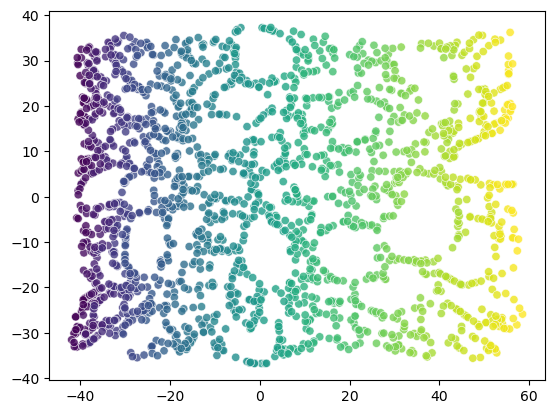

In [16]:
isomap_operator = manifold.Isomap(n_components=2)
Y_isomap = isomap_operator.fit_transform(X)

sns.scatterplot(x=Y_isomap[:, 0], y=Y_isomap[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [17]:
isomap_Y_dists = spatial.distance.squareform(spatial.distance.pdist(Y_isomap,metric = 'euclidean'))

In [18]:
isomap_dists = isomap_operator.dist_matrix_

In [19]:
corr = correlation(X_dists,isomap_dists)
corr[2:]

([0.5345775270495315, (0.5284013434922941, 0.540753710606769)],
 [0.5382448776644694, (0.5322640575523919, 0.5442256977765468)])

In [20]:
tti = manifold.trustworthiness(isomap_dists,ground_truth,n_neighbors=50)
tti

0.9498085424785658

In [21]:
np.savetxt("swiss_Y_isomap.csv",Y_isomap,delimiter=',')

The code runs 5s.


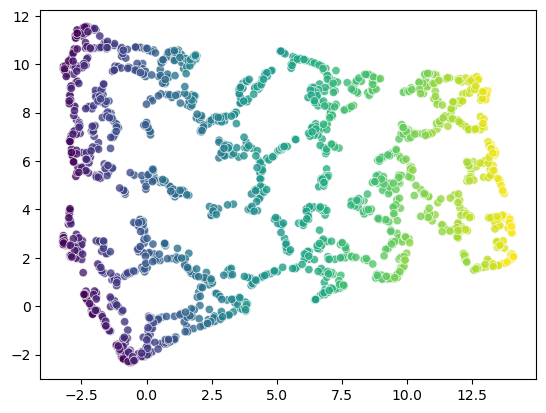

In [22]:
from umap import UMAP

start_time = time.time()
reducer = UMAP() 
Y_umap = reducer.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

sns.scatterplot(x=Y_umap[:, 0], y=Y_umap[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [23]:
np.savetxt("swiss_Y_umap.csv",Y_umap,delimiter=',')

The code runs 6s.


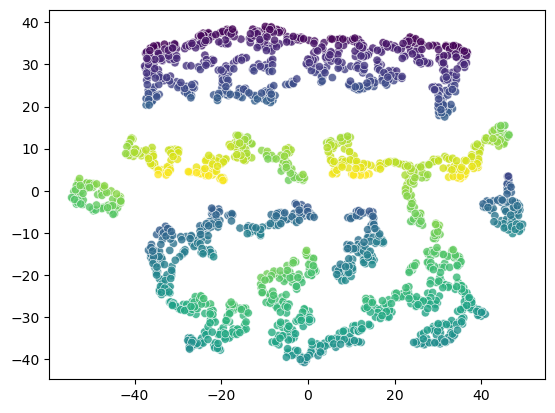

In [24]:

start_time = time.time()
tsne_operator = manifold.TSNE(random_state=0)
Y_tsne = tsne_operator.fit_transform(X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()

In [25]:
np.savetxt("swiss_Y_tsne.csv",Y_tsne,delimiter=',')

In [26]:
import scanpy as sc

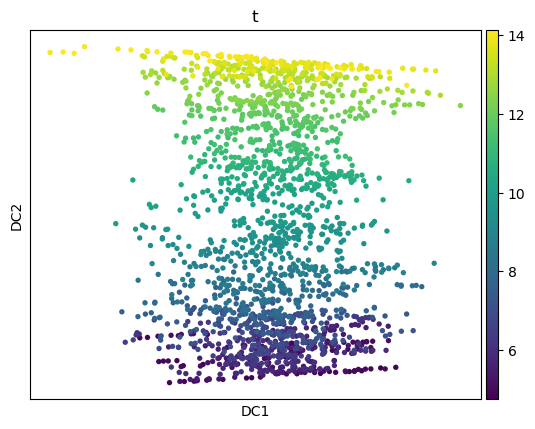

In [27]:
ad = sc.AnnData(X=X)
ad.obs['t'] = t

sc.pp.neighbors(ad, 10)
sc.tl.diffmap(ad, 10)

sc.pl.diffmap(ad,color=['t'])

In [28]:
X_diffmap = ad.obsm['X_diffmap']
np.savetxt("swiss_Y_dm.csv",X_diffmap[:,[0,1]],delimiter=',')

In [29]:
X_dists = spatial.distance.squareform(spatial.distance.pdist(ground_truth,metric = 'euclidean'))
Y_dists = spatial.distance.squareform(spatial.distance.pdist(X_diffmap,metric = 'euclidean'))

In [30]:
corr = correlation(X_dists,Y_dists)
corr[2:]

([0.4934722528730174, (0.4898585930227607, 0.49708591272327407)],
 [0.4579558581194645, (0.4523505896181804, 0.46356112662074855)])

In [31]:
tti = manifold.trustworthiness(Y_dists,ground_truth,n_neighbors=50)
tti

0.9472365913224214

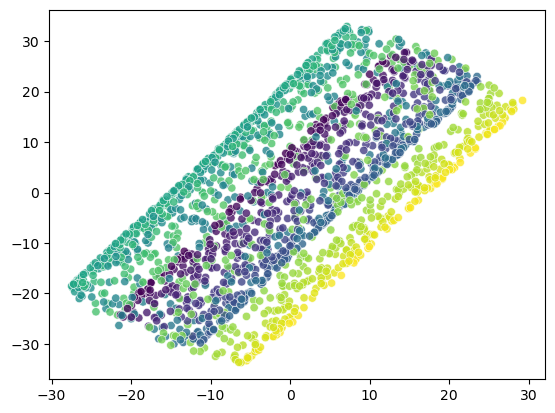

In [32]:
mds_operator = manifold.MDS(random_state=0)
Y_mds = mds_operator.fit_transform(X)

sns.scatterplot(x=Y_mds[:, 0], y=Y_mds[:, 1], hue=t, palette="viridis", alpha=0.8)
plt.legend().remove()
np.savetxt("swiss_Y_mds.csv",Y_mds,delimiter=',')